In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv(r"C:\Users\prach\Desktop\Data Science\ML projects\Titnic_train.csv")

Variable info:

        PassengerId: Unique id number to each passenger.
        Survived: Passenger survive(1) or died(0).
        Pclass: Passenger class.
        Name: Name of passenger.
        Sex: Sex of passenger.
        Age: Age of passenger.
        SibSp: Number of siblings and spouses.
        Parch: Number of parents/childrens.
        Ticket: Ticket number.
        Fare: amount of money spent on ticket
        Cabin: Cabin category
        Embarked: port where passenger embarked(S=Southampton,C=Cherbourg,Q=Queenstown)

In [64]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#There are null value in Age, Cabin and Embarked column 

In [66]:
print(df.shape)
print(df.isnull().sum())

(891, 12)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [67]:
print("The relation between sex of the person and if they survived or not?")
#select the female column who survived 
women = df.loc[df.Sex == 'female'] ['Survived']
rate_of_women = sum(women)/len(women)


#select the male column who survived 
male = df.loc[df.Sex == 'male'] ['Survived']
rate_of_male = sum(male)/len(male)

print("The percent of women who survived is:",(round(rate_of_women,2)*100),"%")
print("The percent of men who survived is:",(round(rate_of_male,2)*100),"%")

The relation between sex of the person and if they survived or not?
The percent of women who survived is: 74.0 %
The percent of men who survived is: 19.0 %


Bar plot to indicate the number of people who survived

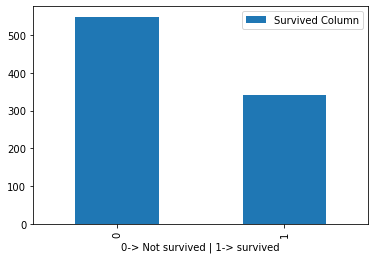

In [68]:
import matplotlib.pyplot as plt

df['Survived'].value_counts().plot.bar()
plt.legend(['Survived Column'])
plt.xlabel("0-> Not survived | 1-> survived")
plt.show()

Bar plot to indicate the count of poeple in each Parch

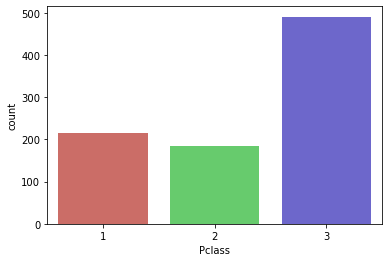

In [69]:
import seaborn as sb
sb.countplot(x='Pclass',data=df, palette='hls')

# Corelation between our target feature Survived and other features

In [70]:
pearson_corr_train = df.corr(method = "pearson")
spearman_corr_train = df.corr(method = "spearman")
kendall_corr_train = df.corr(method = "kendall")

print(pearson_corr_train["Survived"])


PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64


# Bar Plot for counting the frequency for each feature

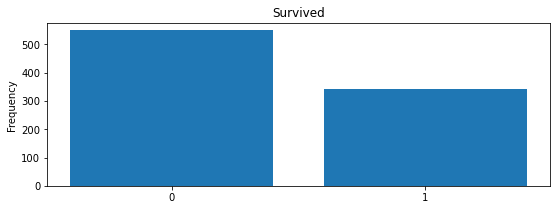

Survived: 
0    549
1    342
Name: Survived, dtype: int64:


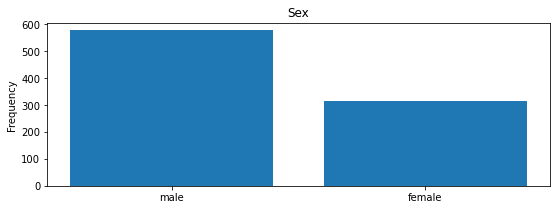

Sex: 
male      577
female    314
Name: Sex, dtype: int64:


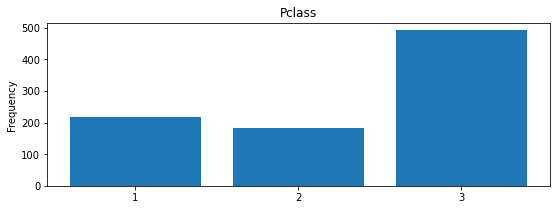

Pclass: 
3    491
1    216
2    184
Name: Pclass, dtype: int64:


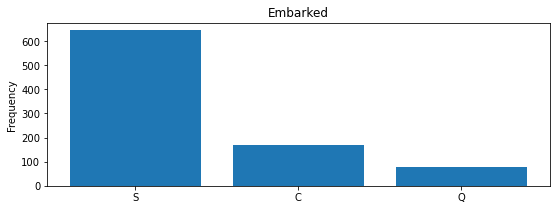

Embarked: 
S    644
C    168
Q     77
Name: Embarked, dtype: int64:


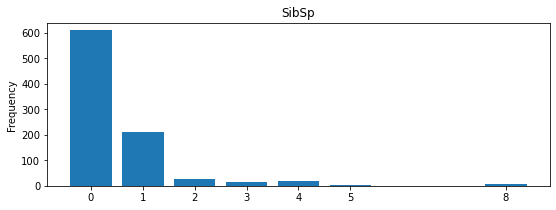

SibSp: 
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64:


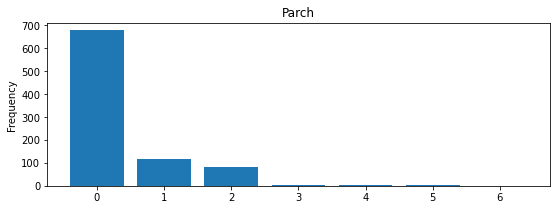

Parch: 
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64:


In [71]:
def bar_plot(variable):
    var=df[variable]
    var_value=var.value_counts()
    plt.figure(figsize=(9,3))
    plt.bar(var_value.index,var_value)
    plt.xticks(var_value.index,var_value.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n{}:".format(variable,var_value))
    
    
category= ["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]
for i in category:
    bar_plot(i)

# Co-relation between Survived and PClass

The relation between Survived and Pclass:


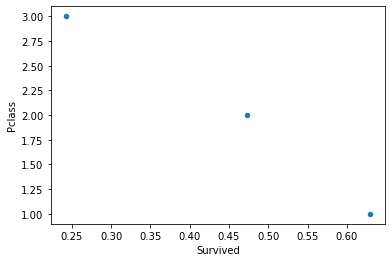

In [53]:
# visualize the correlation between SURVIVED and Pclass using a scatter plot
print("The relation between Survived and Pclass:")
df[['Survived', 'Pclass']].groupby(['Pclass'],as_index=False).mean().plot.scatter('Survived','Pclass')
plt.show()

From the above plot we can infer that higher the Pclass, the number of peole who survived is larger. 

# Co-relation between SibSp and Survived

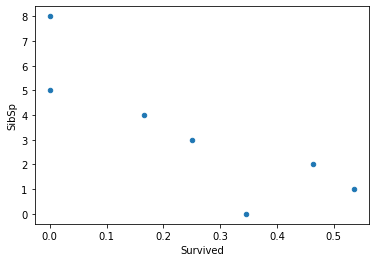

In [72]:
# visualize the correlation between SURVIVED and Age using a scatter plot
df[['Survived', 'SibSp']].groupby(['SibSp'],as_index=False).mean().plot.scatter('Survived','SibSp')
plt.show()

From the above graph, we can infer that higher sibsp less chances of survival. Thus, can be negatively co-related.

# Handling Missing Values

In [73]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
E = {'Embarked':{'C': 0, 'Q': 1, 'S': 2},'Sex': {'male':0,'female':1}}
df.replace(E, inplace = True)

In [75]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2.0


# Feature selection and Missing Values

In [76]:
#to drop values 
train_df = df.drop(['Name','PassengerId','Ticket','Cabin'],1)
train_df .head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2.0
1,1,1,1,38.0,1,0,71.2833,0.0
2,1,3,1,26.0,0,0,7.9250,2.0
3,1,1,1,35.0,1,0,53.1000,2.0
4,0,3,0,35.0,0,0,8.0500,2.0


We dropped the columns of Name, PassengerId, Ticket, Cabin as they are no corelated to Survved column and does not provide any insights. 

In [77]:
#train_df null values
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

C:\Users\prach\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


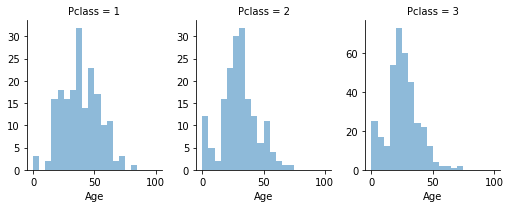

In [78]:
# visualize the correlation between Pclass and Age
grid = sns.FacetGrid(train_df, col='Pclass', size=3, aspect=0.8, sharey=False)
grid.map(plt.hist, 'Age', alpha=.5, bins=range(0,105,5))
plt.show()

In [79]:
#Filling in Age value after noticing the relation with Pclass

def age_approx1(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
    
    
train_df['Age'] = train_df[['Age', 'Pclass']].apply(age_approx1, axis=1)

In [83]:
#Filling in 2 missing values with Embraked = 2, as 2 is the mode
train_df['Embarked'].fillna(2, inplace = True)

In [84]:
#train_df null values
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Modeling 

In [97]:
from sklearn.linear_model import LogisticRegression
logres = LogisticRegression()
x_train = train_df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y_train = train_df['Survived']

logres.fit(x_train,y_train)

reg=logres.fit(x_train,y_train)

C:\Users\prach\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\prach\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [98]:
test_df = pd.read_csv(r"C:\Users\prach\Desktop\Data Science\ML projects\Titanic_test.csv")
newemb = {'Embarked':{'C': 0, 'Q': 1, 'S': 2},'Sex': {'male':0,'female':1}}
test_df.replace(newemb, inplace = True)

#to drop values 
test_df = test_df.drop(['Name','PassengerId','Ticket','Cabin'],1)
test_df.head()

print(test_df.isnull().sum())

def age_approx12(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
    
    
test_df['Age'] = test_df[['Age', 'Pclass']].apply(age_approx12, axis=1)

test_df['Fare'].fillna(0, inplace = True)

In [100]:
predictnow=reg.predict(test_df)
print(predictnow)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [104]:
y_pred_log_reg = logres.predict(test_df)
acc_log_reg = round( logres.score(x_train, y_train) * 100, 2)
print ('The accuracy of Logistic Regression model',str(acc_log_reg) + ' percent')

The accuracy of Logistic Regression 80.36 percent
